# Проект: Введение в машинное обучение

**Цель проекта: построить модель для задачи классификации, которая выберет подходящий тариф.**

Входные данные: сведения о 500 пользователей и их использование сотовой связью.
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы.

**План работы:**
- изучение данных;
- разделение данных на обучающую, валидационную и тестовую выборки;
- постороение моделей c минимальной долей правильных ответов 0,75;
- изучение качества разных моделей;
- проверка качества модели на тестовой выборке;
- проверка модели на вменяемость


## Шаг 1. Обзор данных

## Загружаем данные

Импортируем библиотеки

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier 
import seaborn as sns
%matplotlib inline

Загружаем датафрейм

In [88]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('C:/Users/alnka/Downloads/users_behavior.csv')

Снижает размерность чисел для вывода на экран на всем проекте:

In [89]:
pd.options.display.float_format = '{:,.2f}'.format

## Изучаем данные

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [91]:
display(data.head(5))

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,"19,915.42",0
1,85.00,516.75,56.00,"22,696.96",0
2,77.00,467.66,86.00,"21,060.45",0
3,106.00,745.53,81.00,"8,437.39",1
4,66.00,418.74,1.00,"14,502.75",0


In [92]:
data['is_ultra'].sum()

985

В данном датафрейме 3214 объекта 5 признаков. Пропуски отсутствуют. 

Выборка не сбалансирована, так как количество абонентов с тарифом ультра 985 из 3214 (менее 30%). 

> "Как определить высокие и низкие цены? Хорошо, когда классов в машинном обучении примерно поровну. Почему? Тяжело научиться отличать уток-мандаринок от лутков, если показывать только первых!"

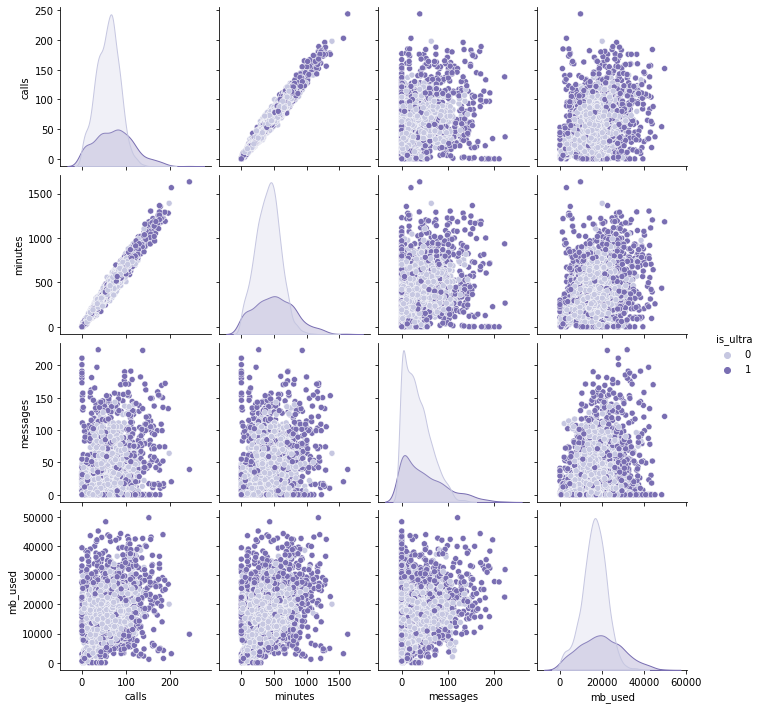

In [93]:
sns.pairplot(data, hue='is_ultra', palette='Purples');

## Разделяем датафрейм на обучающую, валидационную и тестовую выборки

Разделим датафрейм:
- 60% - обучающая выборка
- 20% - валидационная выборка
- 20% - тестовая выборка

In [94]:
df_train, df = train_test_split(data, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df, test_size=0.5, random_state=12345)

Проверяем:

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [97]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


Создаем данные для обучения `features` и целевой признак `target` из обучающей выборки:

In [98]:
features = df_train.drop(['is_ultra'], axis=1)
target = df_train['is_ultra']

Создаем данные для обучения features и целевой признак target из валидационной выборки:

In [99]:
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

Создаем данные для обучения features и целевой признак target из тестовой выборки:

In [100]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

**Вывод**

Данные изучены, разделены и готовы к построению моделей обучения.

## Строим модели

Нам предстоит обучить модель бинарной классификации, определить тариф на основании представленных признаков, поэтому будем использовать модели:
- дерево решений
- случайный лес
- логистическая регрессия

### Дерево решений 

In [101]:
%%time

best = None
best_result = 0 #переменные для лучшего результата 
accuracy_result = [] #переменная для сохранения результатов 
depth_result = [] #переменная для сохранения показателей 
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features, target) #обучаем модель
    predictions_valid = model.predict(features_valid) #получаем предсказания
    accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
    print(f'max_depth = {depth} : {accuracy}') #выводим на экран результаты
    accuracy_result.append(accuracy) #сохраняем результат
    depth_result.append(depth) #сохраняем показатель
    if best_result < accuracy: #выбираем лечшее решение
        best = depth
        best_result = accuracy
print(f'Лучший результат {best_result} у модели с гиперпараметром max_depth= {best}')

max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7744945567651633
max_depth = 3 : 0.7791601866251944
max_depth = 4 : 0.7744945567651633
max_depth = 5 : 0.7838258164852255
max_depth = 6 : 0.776049766718507
max_depth = 7 : 0.7993779160186625
max_depth = 8 : 0.7931570762052877
max_depth = 9 : 0.7807153965785381
Лучший результат 0.7993779160186625 у модели с гиперпараметром max_depth= 7
CPU times: user 59.9 ms, sys: 0 ns, total: 59.9 ms
Wall time: 86.6 ms


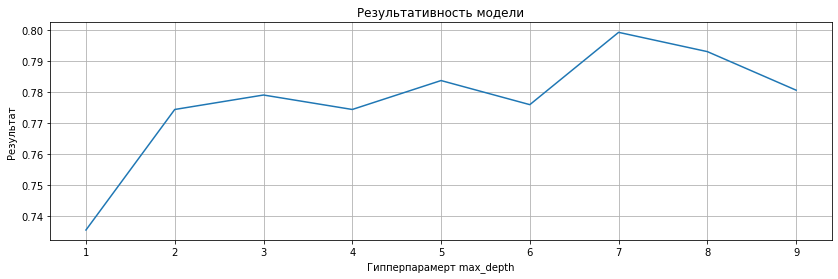

In [102]:
x = depth_result
y = accuracy_result
plt.figure(figsize=(14,4))
plt.plot(x, y)
plt.grid()
plt.title("Результативность модели")
plt.xlabel("Гипперпарамерт max_depth")
plt.ylabel("Результат");

**Вывод:**

Лучший результат показала модель с показателем `depth_result` равной 7 (гиперпараметр решающего дерева - максимальная глубина).

### Случайный лес

In [103]:
%%time
best = None
best_result = 0 #переменные для лучшего результата 
accuracy_result = [] #переменная для сохранения результатов 
est_result = [] #переменная для сохранения показателей 
for est in (5, 10, 15, 20, 25, 30, 50, 100, 150):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features, target) #обучаем модель
    predictions_valid = model.predict(features_valid) #получаем предсказания
    accuracy = accuracy_score(target_valid, predictions_valid) #проверяем долю верных ответов
    print(f'max_depth = {est} : {accuracy}') #выводим на экран результаты
    accuracy_result.append(accuracy) #сохраняем результат
    est_result.append(est) #сохраняем показатель
    if best_result < accuracy: #выбираем лечшее решение
        best = est
        best_result = accuracy
print(f'Лучший результат {best_result} у модели с гиперпараметром max_depth= {best}')

max_depth = 5 : 0.7667185069984448
max_depth = 10 : 0.7807153965785381
max_depth = 15 : 0.7807153965785381
max_depth = 20 : 0.7822706065318819
max_depth = 25 : 0.7776049766718507
max_depth = 30 : 0.7853810264385692
max_depth = 50 : 0.7931570762052877
max_depth = 100 : 0.7853810264385692
max_depth = 150 : 0.7884914463452566
Лучший результат 0.7931570762052877 у модели с гиперпараметром max_depth= 50
CPU times: user 1.5 s, sys: 20.1 ms, total: 1.52 s
Wall time: 1.64 s


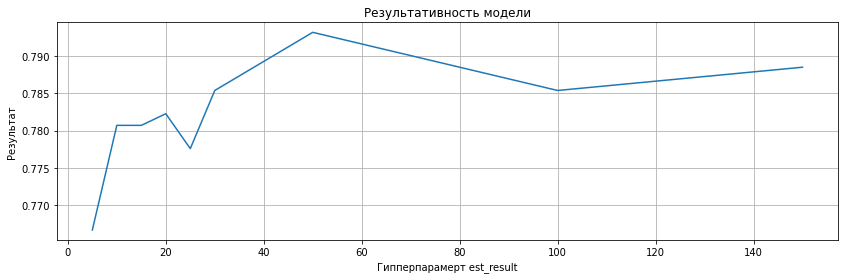

In [104]:
x = est_result
y = accuracy_result
plt.figure(figsize=(14,4))
plt.plot(x, y)
plt.grid()
plt.title("Результативность модели")
plt.xlabel("Гипперпарамерт est_result")
plt.ylabel("Результат");

**Вывод:**

Лучший результат показала модель с показателем `n_estimators` равной 50 (гиперпараметр случайного леса - количество деревьев).

### Логистическая регрессия

In [105]:
%%time

model = LogisticRegression(random_state=12345)
model.fit(features, target)
predictions_valid = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
print(f' Модель логистической регрессии на валидационной выборке: {accuracy}')

 Модель логистической регрессии на валидационной выборке: 0.6842923794712286
CPU times: user 19.5 ms, sys: 134 µs, total: 19.6 ms
Wall time: 18.2 ms


**Вывод**

Модель логистической регрессии дает результат 0.68 успешных предсказаний (доля).

**Вывод:**
- Модель случайного леса медленне, но дает лучший результат
- Модель дерева решений показало так же хороший результат
- Модель логистической регрессии показало самый низкий результат на валидационной и тестовой выборке, но показало самую высокую скорость. 


## Проверка качества моделей на тестовой выборке.

Для проверки моделей на тестовой выборке, объединяем обучающую выборку с валидационной. Аналогично поступаем с целевым признаком.

In [106]:
features_training = features.append(features_valid)
target_training = target.append(target_valid)

Проверяем:

In [107]:
features_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 3027 to 2313
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2571 non-null   float64
 1   minutes   2571 non-null   float64
 2   messages  2571 non-null   float64
 3   mb_used   2571 non-null   float64
dtypes: float64(4)
memory usage: 100.4 KB


In [108]:
target_training

3027    0
434     0
1226    0
1054    0
1842    0
       ..
2401    0
2928    1
1985    0
357     0
2313    0
Name: is_ultra, Length: 2571, dtype: int64

In [109]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_training, target_training) #обучаем модель
predictions_test = model.predict(features_test) #получаем предсказания
accuracy = accuracy_score(target_test, predictions_test)
print(f' Модель дерева решений на тестовой выборке: {accuracy}')

 Модель дерева решений на тестовой выборке: 0.7916018662519441


In [110]:
model = RandomForestClassifier(random_state=12345, n_estimators=50)
model.fit(features_training, target_training) #обучаем модель
predictions_test = model.predict(features_test) #получаем предсказания
accuracy = accuracy_score(target_test, predictions_test)
print(f' Модель случайного леса на тестовой выборке: {accuracy}')

 Модель случайного леса на тестовой выборке: 0.80248833592535


In [111]:
model = LogisticRegression(random_state=12345)
model.fit(features_training, target_training)
predictions_test = model.predict(features_test) #получаем предсказания
accuracy = accuracy_score(target_test, predictions_test)
print(f' Модель логистической регрессии на тестовой выборке: {accuracy}')

 Модель логистической регрессии на тестовой выборке: 0.7060653188180405


Для решения поставленной задачи нам подойдет модель случайного леса с гиперпараметром (количество деревьев) равное 50.

## Проверка модели на вменяемость

In [112]:

dummy = (DummyClassifier(strategy='most_frequent', random_state=12345)
         .fit(features_training, target_training))
print('Accuracy Dummy-модели на тестовой выборке:', dummy.score(features_test,target_test))


Accuracy Dummy-модели на тестовой выборке: 0.7060653188180405


**Вывод**

Результаты проверки данных на DummyClassifier (фиктивной модели) установили порог адекватности 70% успешных предсказанных значений. Выбранная нами модель случайного леса имеет большую результативность и может считаться вменяемой.

## Вывод:

В ходе проделанной работы было выполнено:

- изучение данных;
- разделение данных на обучающую, валидационную и тестовую выборки;
- постороены модели 
    * дерево решений
    * случайный лес
    * логистическая регрессия;
- изучение качества разных моделей;
- проверка качества модели на тестовой выборке;
- проверка модели на вменяемость

Для решения поставленной задачи нам подойдет модель случайного леса с гиперпараметром (количество деревьев) равное 50 с результативностью предсказаний 80%.

Результаты проверки данных на DummyClassifier (фиктивной модели) установили порог адекватности 70% успешных предсказанных значений. Выбранная нами модель случайного леса имеет большую результативность и может считаться вменяемой.